In [37]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
file_url ='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data= pd.read_csv(file_url)

In [5]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


Pclass: ticket class 
Name
Sex
Age
SibSp: number of sibling and spouse
Parch: number of parents and children
Ticket: ticket number
Embarked: C-Cherbourg, Q-Queenstown, S-Southampton
Survived: 1-Survived 0-Dead

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [9]:
round(data.describe(),2)

,Pclass,Age,SibSp,Parch,Survived
count,889.00,889.00,889.00,889.00,889.00
mean,2.31,29.32,0.52,0.38,0.38
std,0.83,12.98,1.10,0.81,0.49
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,0.00
50%,3.00,28.00,0.00,0.00,0.00
75%,3.00,35.00,1.00,0.00,1.00
max,3.00,80.00,8.00,6.00,1.00


In [12]:
data.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


<Axes: >

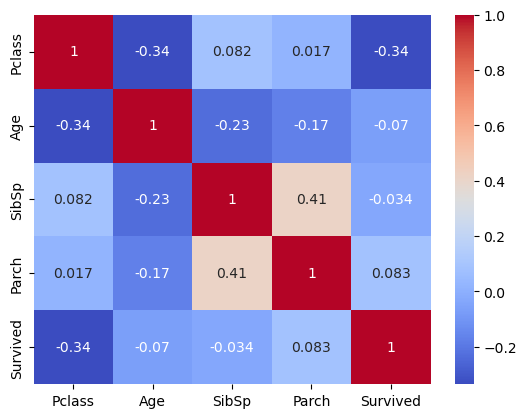

In [19]:
sns.heatmap(data.corr(numeric_only = True), cmap = 'coolwarm', annot = True)

One hot coding

In [32]:
data=pd.get_dummies(data, columns = ['Sex','Embarked'], drop_first = True)

In [43]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True) 

In [44]:
X=data.drop(['Name', 'Ticket','Survived'], axis = 1)
y=data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2)

In [45]:
model=LogisticRegression()

In [46]:
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred= model.predict(X_test)

In [48]:
accuracy_score(y_test, pred)

0.7640449438202247

In [49]:
pd.DataFrame(model.coef_[0], index = X.columns)

,0
Pclass,-1.148200
Age,-0.041639
Sex_male,-2.631980
Embarked_Q,-0.018274
Embarked_S,-0.314137
family,-0.139532
